In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install -q tensorflow_hub

In [0]:
from __future__ import absolute_import, division, print_function

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import layers

tf.VERSION

W0413 16:41:53.043297 140699097388928 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


'1.13.1'

In [0]:
from keras.applications import VGG16
#Load the VGG model
image_size = 224
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))


Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.
W0413 16:41:55.614335 140699097388928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7ff6a9aa7f98> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a98f8400> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a9912080> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff6a98b16d8> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a98b11d0> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a98644e0> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff6a987bba8> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a987b710> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a98273c8> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a983de10> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff6a97e86a0> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a97e81d0> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a9797358> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a97ad978> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff6a97c4f98>

In [0]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0413 16:42:03.505389 140699097388928 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 4100      
Total params: 40,409,924
Trainable params: 32,774,660
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
data_train= '/content/drive/My Drive/maps/train'
data_test = '/content/drive/My Drive/maps/test'


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32
 
train_generator = train_datagen.flow_from_directory(
        str(data_train),
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

for image_batch,label_batch in train_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break
  


Found 360 images belonging to 4 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 4)


In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_size_v = [224,224]
image_data_train = image_generator.flow_from_directory(str(data_train),target_size=image_size_v)
for image_batch,label_batch in image_data_train:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break

Found 360 images belonging to 4 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 4)


In [0]:
image_data_test = image_generator.flow_from_directory(str(data_test),target_size=image_size_v)
for image_batch,label_batch in image_data_test:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break

Found 40 images belonging to 4 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 4)


In [0]:
test_generator = validation_datagen.flow_from_directory(
        str(data_test),
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
for image_batch,label_batch in test_generator :
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break

Found 40 images belonging to 4 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 4)


In [0]:
model.compile(
  optimizer=tf.train.AdamOptimizer(), 
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [0]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])

In [0]:
steps_per_epoch = image_data_train.samples//image_data_train.batch_size
batch_stats = CollectBatchStats()
model.fit((item for item in image_data_train), epochs=20, 
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [batch_stats])

AttributeError: ignored

In [0]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats.batch_losses)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats.batch_acc)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=test_generator,
      validation_steps=test_generator.samples/test_generator.batch_size,
     )
 
# Save the model
model.save('small_last4.h5')

Instructions for updating:
Use tf.cast instead.


W0413 16:42:32.057335 140699097388928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Epoch 1/30
12/11 [================================] - 20s 2s/step - loss: 1.8793 - acc: 0.3266 - val_loss: 1.1821 - val_acc: 0.4000
Epoch 2/30
12/11 [================================] - 15s 1s/step - loss: 1.0941 - acc: 0.5465 - val_loss: 0.6134 - val_acc: 0.7500
Epoch 3/30
12/11 [================================] - 15s 1s/step - loss: 0.7609 - acc: 0.7252 - val_loss: 0.7259 - val_acc: 0.7500
Epoch 4/30
12/11 [================================] - 14s 1s/step - loss: 0.5022 - acc: 0.8613 - val_loss: 0.1106 - val_acc: 0.9500
Epoch 5/30
12/11 [================================] - 15s 1s/step - loss: 0.3335 - acc: 0.8861 - val_loss: 0.0943 - val_acc: 0.9500
Epoch 6/30
12/11 [================================] - 15s 1s/step - loss: 0.2354 - acc: 0.9123 - val_loss: 0.3814 - val_acc: 0.8750
Epoch 7/30
12/11 [================================] - 15s 1s/step - loss: 0.1692 - acc: 0.9450 - val_loss: 0.0459 - val_acc: 0.9750
Epoch 8/30
12/11 [================================] - 14s 1s/step - loss: 0.

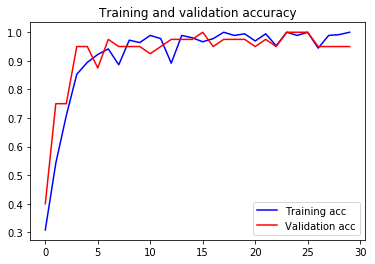

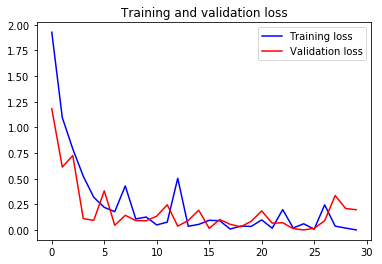

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()